# Trabalho Prático 2 em Sistemas Operacionais
## Alunos: <br>Turi Andrade Vaconcelos Rezende (2020007074)<br>Lourenço Ferreira Monteiro Dias Montenegro (2020006744)
## Introdução
O trabalho prático 2 tem como objetivo simular a utilização de memória virutal utilizando quatro algoritmos de substituição de páginas diferentes:<br><br>
⦁&emsp;Random: página escolhida aleatoriamente.<br>
⦁&emsp;First-In-First-Out (FIFO): página que primeiro foi utilizada será escolhida. Usa uma fila que contém as páginas na ordem em que foram acessadas pela primeira vez.<br>
⦁&emsp;Last-Recently-Used (LRU): página que não foi acessada a mais tempo escolhida.<br>
⦁&emsp;Segunda chance: A mesma fila de páginas do algoritmo FIFO é percorrida, mas de forma circular. Caso a página corrente não tenha sido referenciada recentemente, ela é escolhida, caso contrário ela recebe uma segunda chance e a processo se reprete para a próxima página da fila. A fila contém as páginas na ordem em que foram acessadas pela primeira vez.<br><br>
Além disso, o tamanho das páginas entre 2 e 64 kilobytes e o tamanho total da memória entre 128 a 16384 kilobytes. Todos esses elementos citados são passados na entrada do algoritmo, juntamente com o arquivo contendo a sequência de endereços de memórias acessados.
## Estruturas de Dados
Para simular os algoritmos de memória virtual, utilizamos as seguintes estruturas que serão explicadas nessa seção: ArgParser, MainPage, PageTable, AcessQueue e AcessRecord.<br><br>
A estrutura ArgParser foi criada com intuito de armazenar as informações de entrada algoritmo de substituição de páginas, arquivo de endereços de memória, tamanho em KB das páginas e o tamanho em KB da memória. O único método presente nessa struct é o de inicialização da classe que trata possíveis erros de entrada e, caso não hajam erros, define o algoritmo utilizado e os demais atributos da classe.<br><br>
Em seguida, a estrutura MainPage é utilizada para simular os frames da memória principal. Nela estão contidos os bit de validade e "dirty" (se a página foi modificada em relação ao disco), índice invertido da página virtual que referencia o frame e um AccessRecord que será explicado mais adiante. Os métodos utilizados nessa estrutura de dados são para escrita e leitura no endereço de memória escolhido, remoção e substituição do frame na memória principal, além de métodos auxiliares como obter o índice invertido.<br><br>
Ademais, a estrutura PageTable simula a tabela de páginas. Nela estão armazenadas um array de páginas virtuais, em que cada posição é uma referência à um frame físico (MainPage), o algoritmo que será utilizado para reposição, o array de frames físicos e uma estrutura AccessQueue que será explicada adiante. A estrutura da tabela é responsável por reportar o perfil de acessos à memória, mapear endereços virtuais para físicos e gerenciar a memória de forma geral, executando, por exemplo, o algoritmo de reposição de páginas selecionado.<br><br>
As estruturas AccessRecord e AccessQueue são usadas em conjunto para execução dos algoritmos de substituição.<br><br> 
A estrutura AccessQueue é, em si, a fila utilizada pelos algoritmos FIFO, segunda chance e LRU, e é responsável por registrar os a ordem que que os acessos à memória são feitos.<br><br>
Já a estrutura AccessRecord representa cada item da fila AccessQueue e contém informações adicionais necessárias para a execução dos algoritmos de reposição, como o bit de segunda chance.<br><br>
## Fluxo de execução
Por fim, para melhor entendimento do fluxo do algoritmo, segue um passo a passo da execução. Começamos, ao receber a entrada, verificando se há alguma inconsistência, caso não haja, definimos os argumentos da entrada (tamanho da memória, tabela de páginas) e seguimos para abertura do arquivo, verificando se o arquivo é válido. A partir disso o algoritmo começa iterando por todas as linhas do arquivo chamando a função de acesso a memória, que calculará o endereço e modo (escrita ou leitura). Após esse processamento, o método de acesso à memória da estrutura PageTable é invocado, de forma a verificar a mapear o endereço virtual para o físico correspondente e realizar as seguintes operações:<br><br>
⦁&emsp;Página está na memória principal e é válida: apenas realiza a leitura ou escrita, atualizando o dirty bit se necessário. <br>
⦁&emsp;Página está na memória principal e não é válida: buscar página na memória secudária e realizar a leitura ou escrita, atualizando o dirty bit se necessário. <br>
⦁&emsp;Página não está na memória principal e a memória principal ainda possui espaço: buscar página na memória secudária e realizar a leitura ou escrita, atualizando o dirty bit se necessário.<br>
⦁&emsp;Página não está na memória principal, mas a memória principal está cheia: executar algoritmo de reposição de páginas escolhido e substituir a página determinada pelo algoritmo pela página a ser inserida. Quando a página determinada pelo algoritmo é removida, é necessário fazer uma escrita à memória secundária se o dirty bit estiver ativado. Além disso, é necessário fazer uma leitura na memória secundária para buscar a página a ser inserida.<br><br>
Após esse processo ser executado para cada acesso à memória, informações sobre a execução, como o número de page faults e o número de escritas à memória são reportadas.
## Decisões de projeto
A principal decisão de projeto que afeta o desempenho dos algoritmos está relacionado ao algoritmo segunda chance (2a)<br>
A lista circular de frames da memória física é a estrutura AccessQueue, ou seja, está ordenada de forma descendente em relação ao tempo decorrido do primeiro acesso a uma página. Em relação ao tempo de execução, acreditamos que essa implementação seja mais eficiente, pois permite que uma página com bit de segunda chance igual a 0 seja encontrada mais rapidamente. Contudo, tal decisão pode fazer com que o resultado reportado (número de escritas e leituras à memória secundária) seja um pouco diferente do resultado esperado quando o algoritmo é implementado da forma usual.

## Análise de desempenho
Para analisar o desempenho dos algoritmos de reposição de páginas, foram feitos diversos testes com os arquivos de teste disponibilizados, e o objeto de análise foram o número de leituras e escritas à memória secundária, tanto de forma agregada quanto variando-se o tamanho da memória principal e o tamanho da página.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Resultado dos testes

In [2]:
testOutput = pd.read_csv("./test/testOutput.csv")
testOutput

,input_path,virtual_memory_size,main_memory_size,page_size,replacement_algorithm,secondary_memory_reads,secondary_memory_writes
0,./mocks/compilador.log,4194304,256,4,lru,59089,8863
1,./mocks/compilador.log,4194304,256,4,2a,57051,7808
2,./mocks/compilador.log,4194304,256,4,random,75313,12324
3,./mocks/compilador.log,4194304,256,4,fifo,70315,12053
4,./mocks/compilador.log,4194304,256,16,lru,102959,14033
...,...,...,...,...,...,...,...
187,./mocks/matriz.log,4194304,16384,16,fifo,2294,633
188,./mocks/matriz.log,4194304,16384,64,lru,2331,781
189,./mocks/matriz.log,4194304,16384,64,2a,2438,824
190,./mocks/matriz.log,4194304,16384,64,random,3567,1278


### Estatísticas agregadas

In [20]:
groups = testOutput.groupby(by="replacement_algorithm")[
    ["secondary_memory_reads", "secondary_memory_writes"]
].mean().astype(int).sort_values(by=["secondary_memory_reads", "secondary_memory_writes"])
groups

,secondary_memory_reads,secondary_memory_writes
replacement_algorithm,,
2a,33265,7592
lru,35800,8190
fifo,45535,10477
random,46871,10271


Na tabela acima, são mostrados os números médios de leituras (page faults) e escritas à memória secundária nos testes feitos para cada um dos algoritmos. É possível perceber que os algoritmos 2a e lru tem um desempenho médio próximo, assim como os algoritmos fifo e random. Além disso, é posspivel perceber que os dois primeiros tem um desempenho médio superior aos dois últimos.

In [22]:
norm = groups/groups.max()
norm

,secondary_memory_reads,secondary_memory_writes
replacement_algorithm,,
2a,0.709714,0.724635
lru,0.763799,0.781712
fifo,0.971496,1.000000
random,1.000000,0.980338


Aqui estão os desempenhos médios dos algoritmos normalizados pelo pior deles. É possível perceber que o algoritmo com o pior desempenho médio foi o random, e que o algoritmo fifo apresenta valores médios muito próximos de random. 

Já os algoritmos 2a e lru foram, na média, entre 20% e 30% melhores do que o algoritmo random, sendo o 2a o melhor deles.

In [3]:
def plotAlgorithms(data, x, xlabel, y, ylabel, ax, xlim, ylim, title):
        
    for algorithm in data["replacement_algorithm"].unique():

        dataAlg = data.loc[
            (data["replacement_algorithm"] == algorithm)
        ]

        ax.plot(
            dataAlg[x], 
            dataAlg[y], 
            label=f"Algorithm: {algorithm}",
        )
        ax.legend()
        ax.set(title=title, xlim=xlim, ylim=ylim, xlabel=xlabel, ylabel=ylabel)

### Grafícos ( Eixo x = Tamanho da Página , Eixo y = Acessos à memória secundária )

##### Tamanho da memória principal = 256 KB

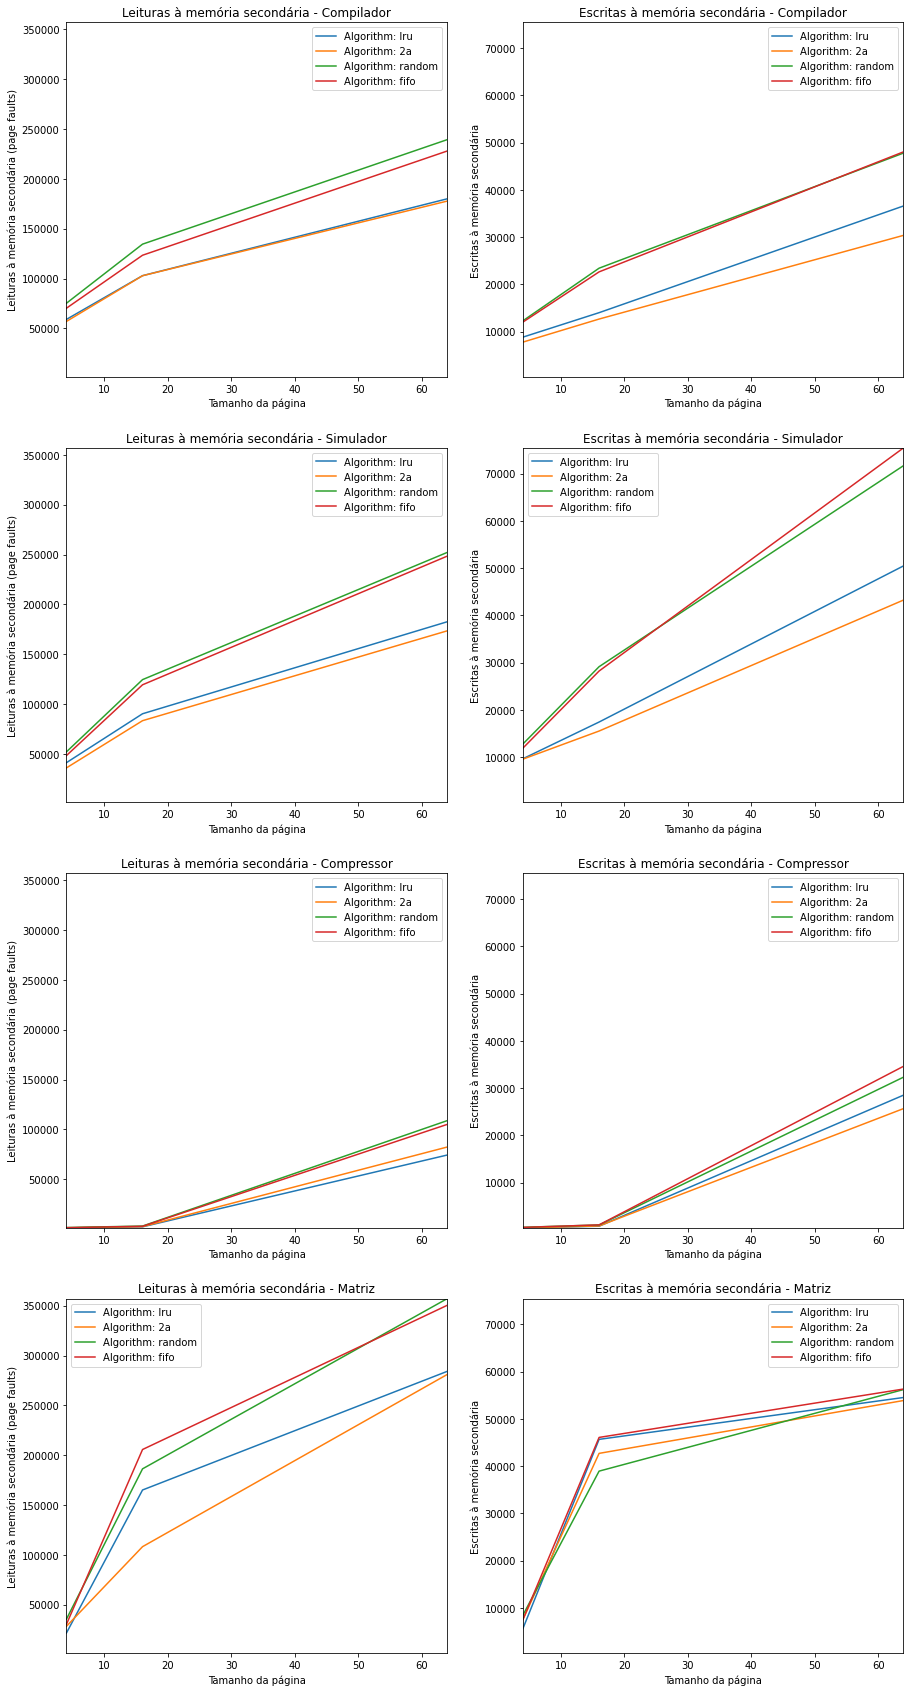

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 256

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]

xlim = [testOutputMemory["page_size"].min(), testOutputMemory["page_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

##### Tamanho da memória principal = 1024 KB

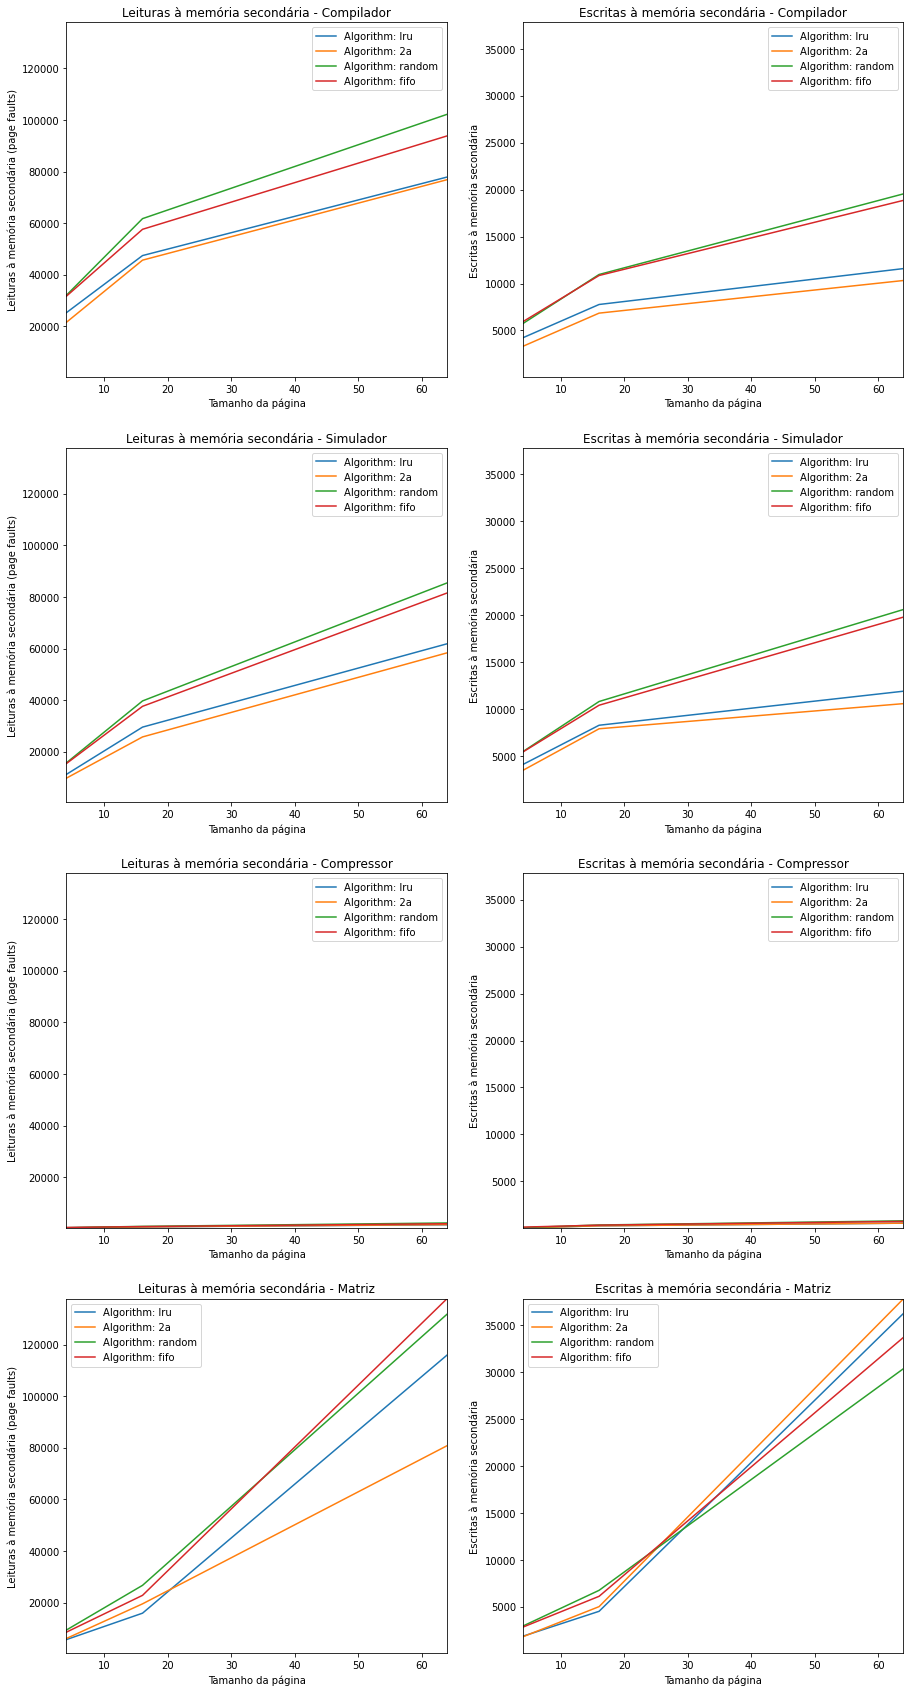

In [7]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 1024

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]

xlim = [testOutputMemory["page_size"].min(), testOutputMemory["page_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

##### Tamanho da memória principal = 4096 KB

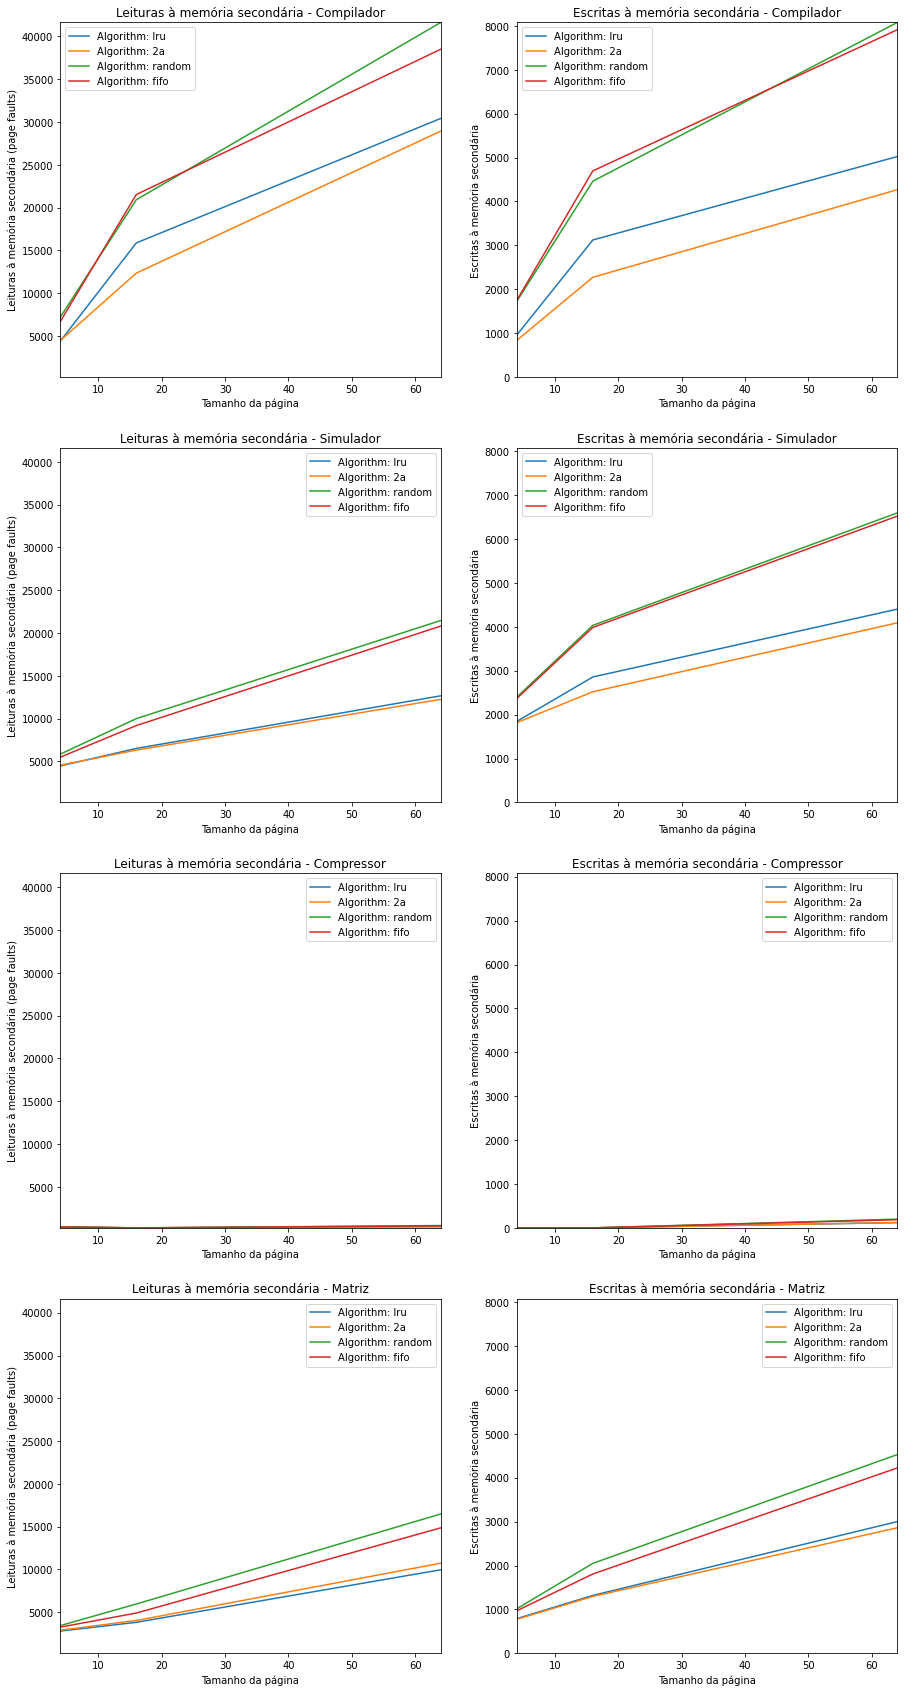

In [8]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 4096

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]

xlim = [testOutputMemory["page_size"].min(), testOutputMemory["page_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

##### Tamanho da memória principal = 16384 KB

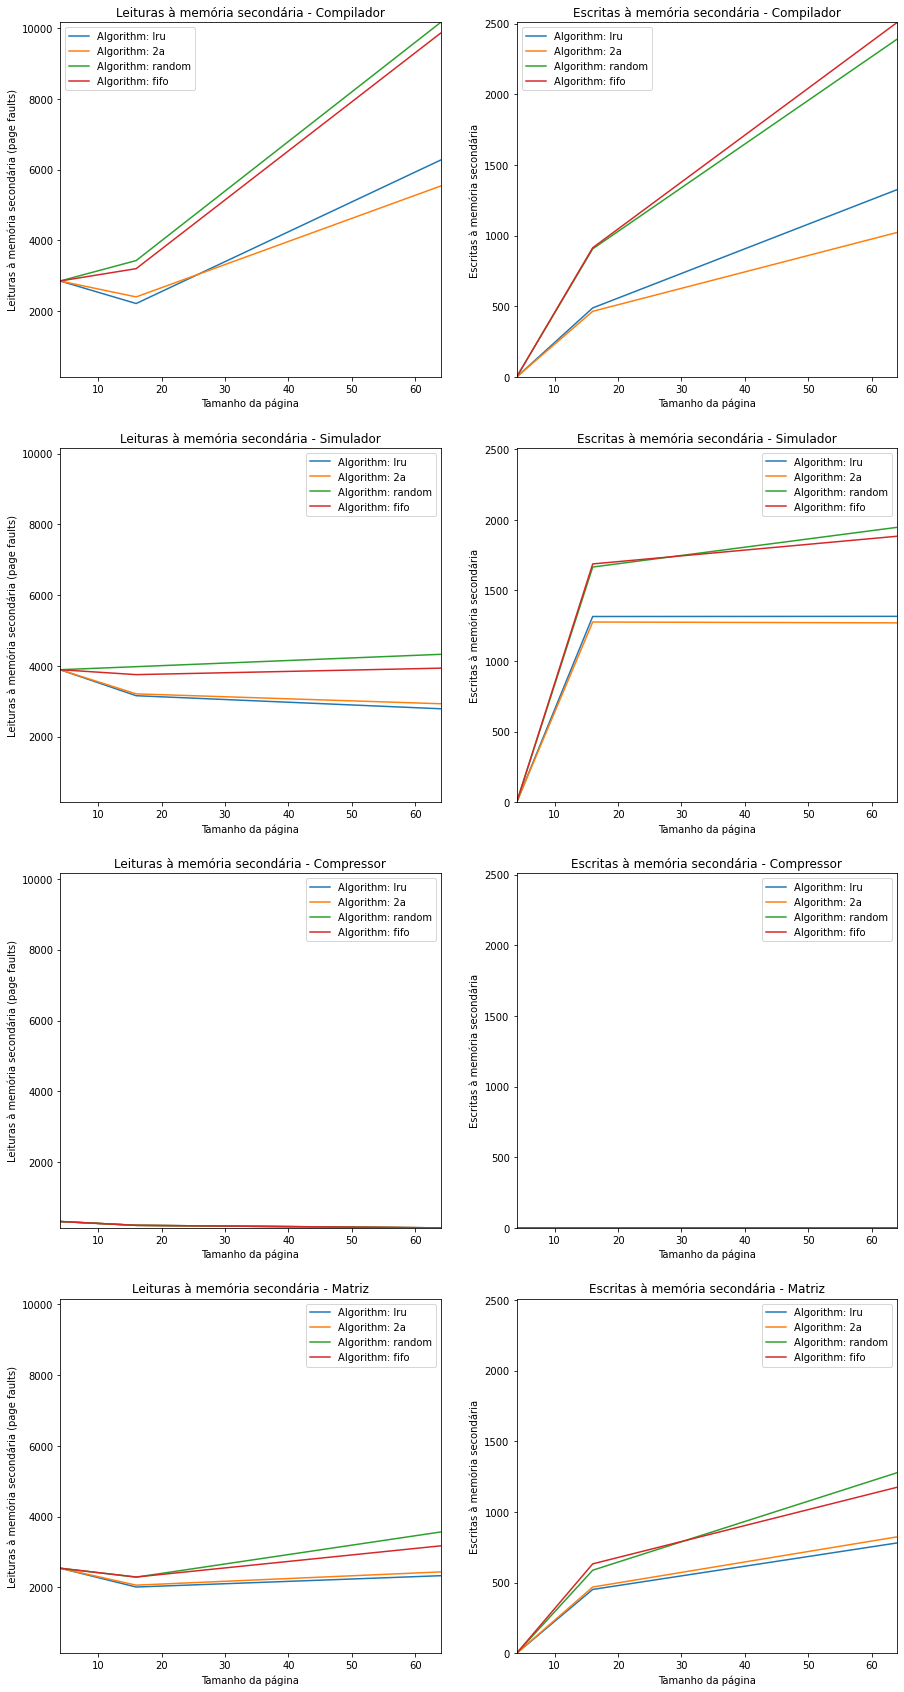

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

mainMemorySize = 16384

testOutputMemory = testOutput.loc[testOutput["main_memory_size"] == mainMemorySize]

xlim = [testOutputMemory["page_size"].min(), testOutputMemory["page_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da página",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="page_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da página",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

##### Anáilse dos gráficos 
Para quase todas as configurações, os algoritmos 2a e lru são os mais eficientes quanto ao número de acessos à memória secondária, tendo um desempenho aproximadamente igual. Já os algoritmos fifo e random se mostraram menos eficientes, e tiveram um desempenho parecido.

Considerando as heurísticas de cada algoritmo, era esperado que 2a e lru fossem mais eficientes. Eles capturam melhor o perfil de acessos à memória, pois levam em consideração o acesso mais recente à uma posicão de memória, equanto fifo leva em consideração o primeiro. O desempenho do algoritmo random segue um modelo probabilistíco baseado em uma distribuição uniforme, e se mostrou muito próximo do desempenho do algoritmo fifo.

Também foi possível perceber que para as instâncias observadas, de forma geral, à medida que o tamanho da página aumenta, o número de acessos à memória secundária também aumenta. Isso se deve ao fato de que o número de páginas diminui com o aumento do tamanho de cada página, de forma que page faults e reposições são mais frequentes, implicando no aumento de leituras e escritas à memória secundária.

### Grafícos ( Eixo x = Tamanho da memória principal , Eixo y = Acessos à memória secundária )

#### Tamanho da página = 4 KB

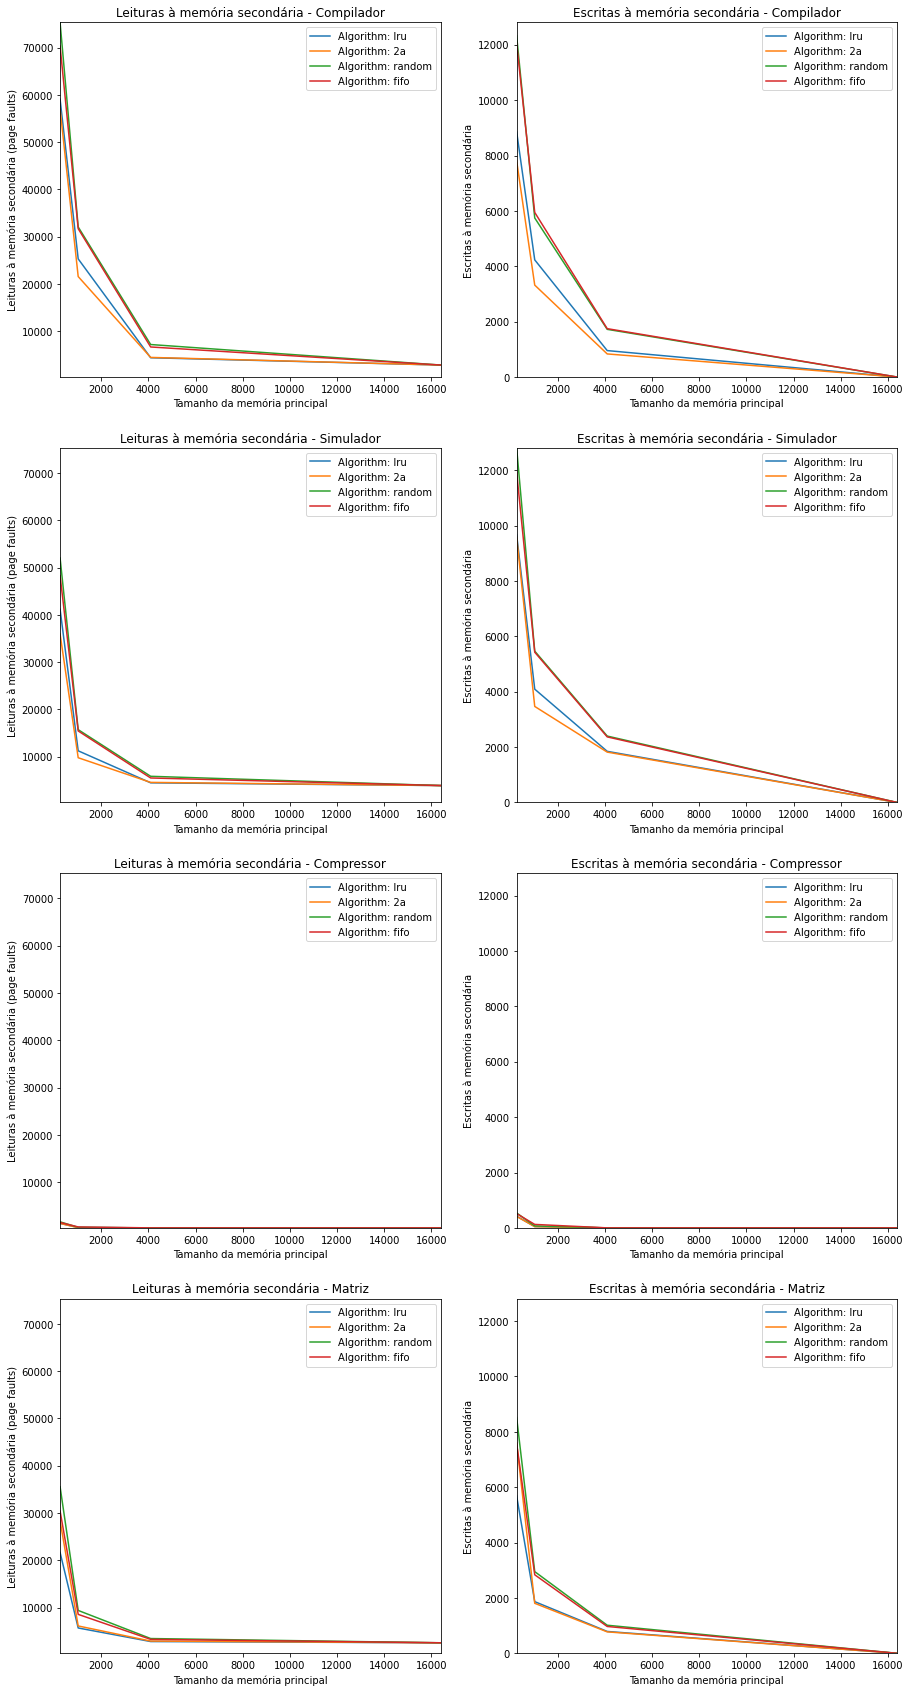

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

pageSize = 4

testOutputMemory = testOutput.loc[testOutput["page_size"] == pageSize]

xlim = [testOutputMemory["main_memory_size"].min(), testOutputMemory["main_memory_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

#### Tamanho da página = 16 KB

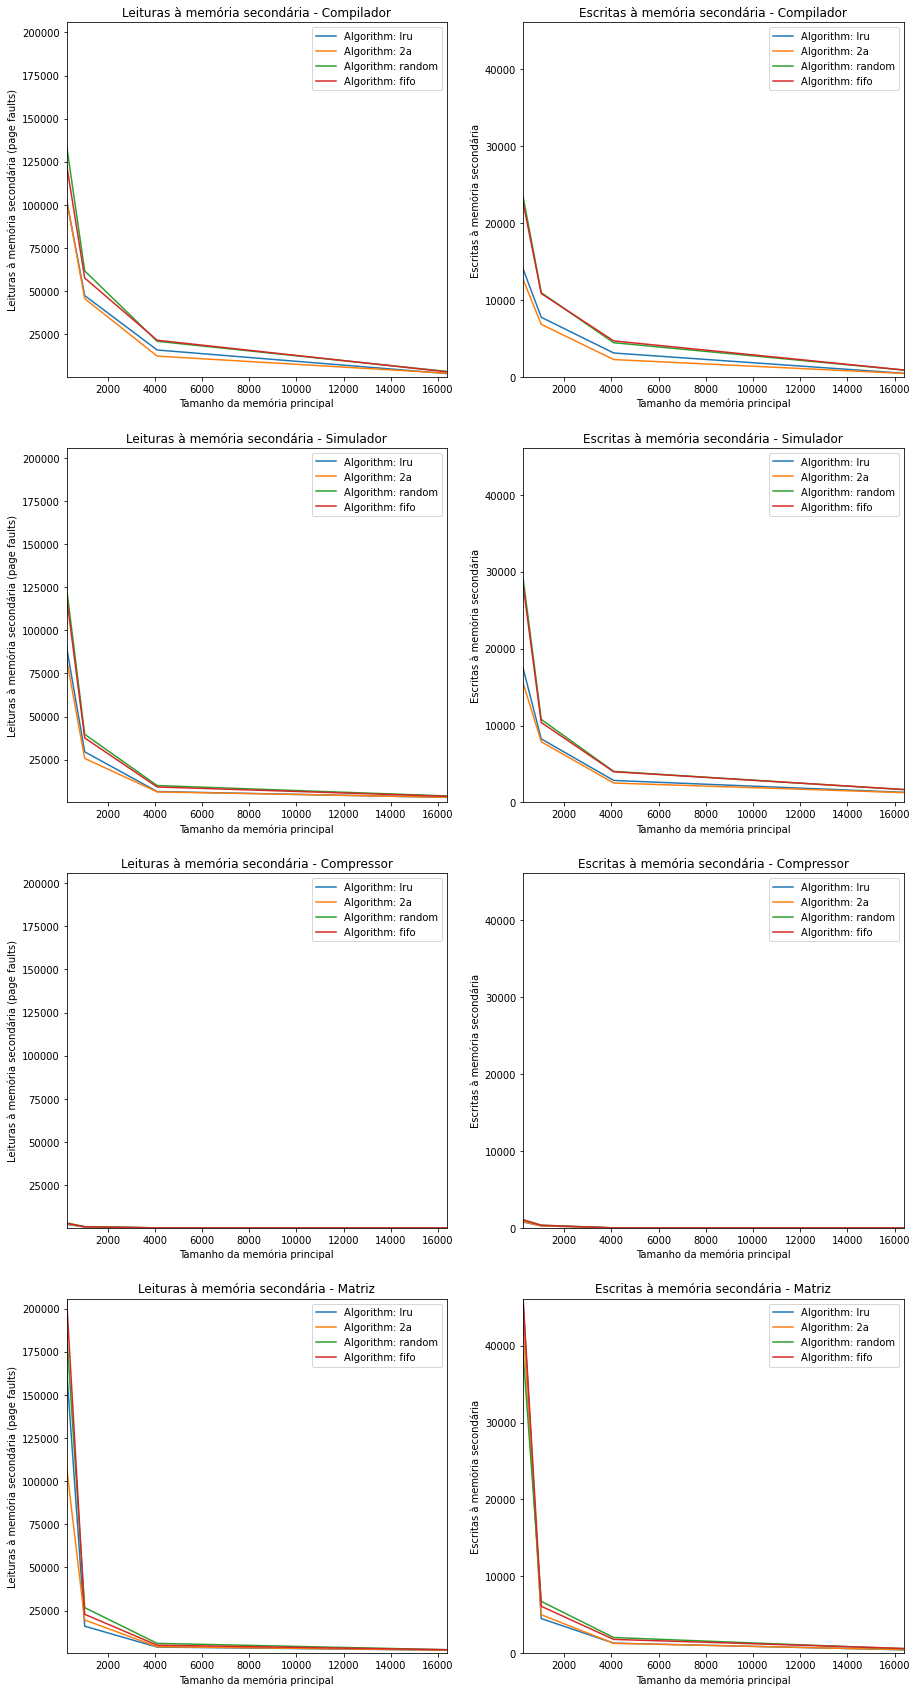

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

pageSize = 16

testOutputMemory = testOutput.loc[testOutput["page_size"] == pageSize]

xlim = [testOutputMemory["main_memory_size"].min(), testOutputMemory["main_memory_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

#### Tamanho da página = 64 KB

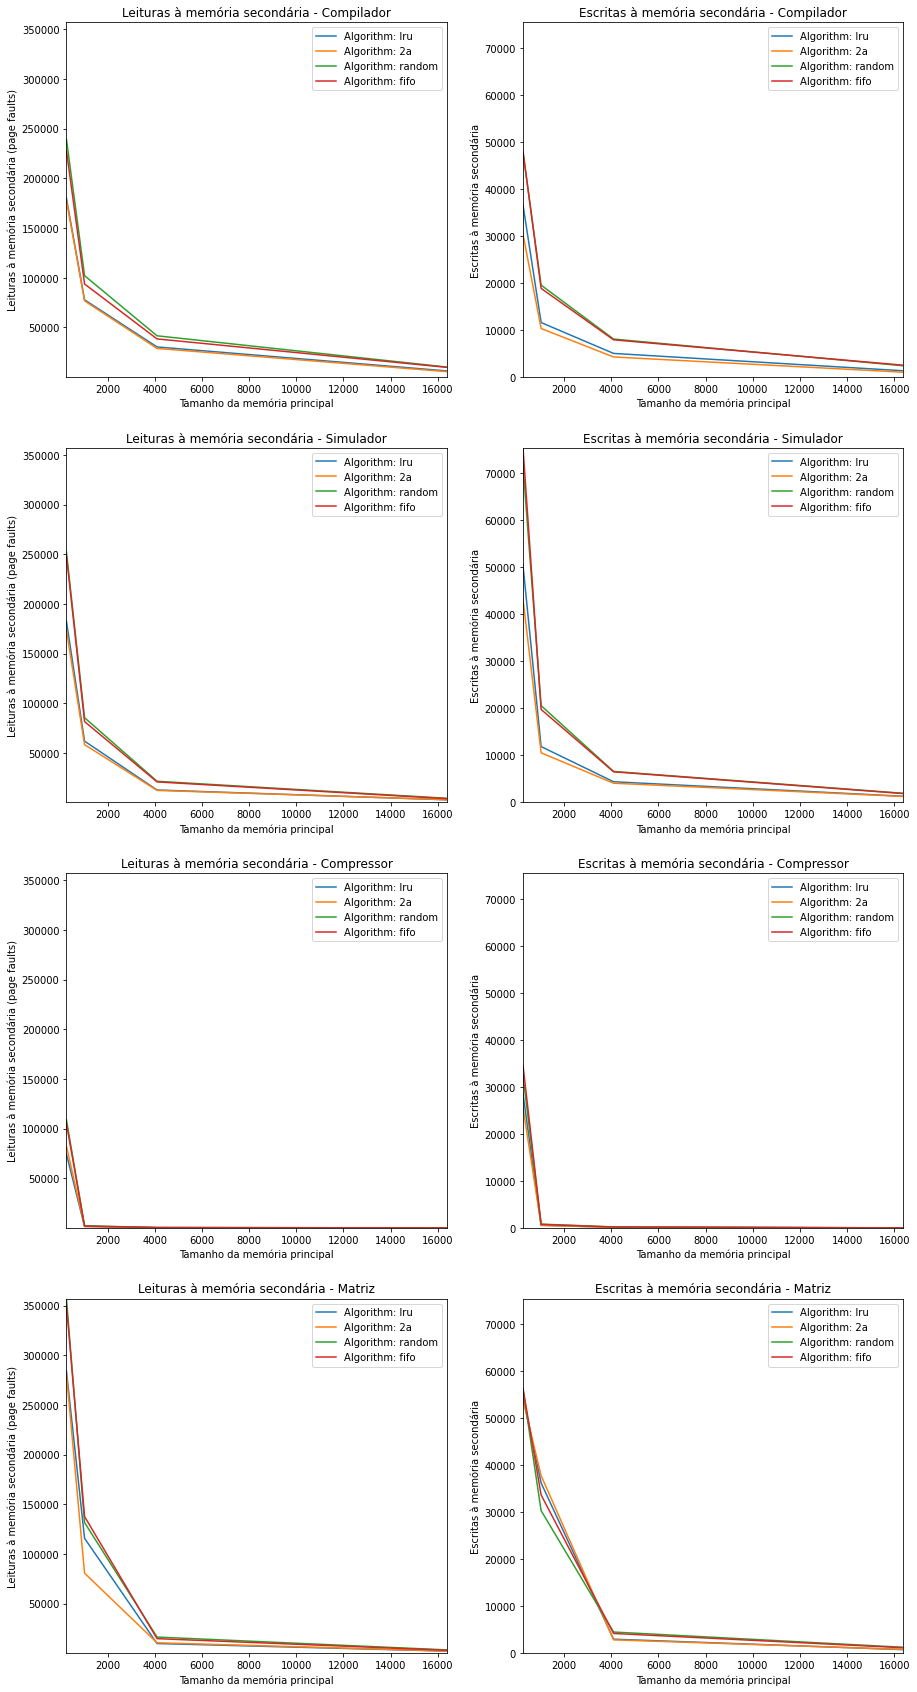

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(15, 30))

pageSize = 64

testOutputMemory = testOutput.loc[testOutput["page_size"] == pageSize]

xlim = [testOutputMemory["main_memory_size"].min(), testOutputMemory["main_memory_size"].max()]
ylimR = [testOutputMemory["secondary_memory_reads"].min(), testOutputMemory["secondary_memory_reads"].max()]
ylimW = [testOutputMemory["secondary_memory_writes"].min(), testOutputMemory["secondary_memory_writes"].max()]

plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[0][0],
    title="Leituras à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[1][0],
    title="Leituras à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[2][0],
    title="Leituras à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_reads",
    xlim=xlim,
    ylim=ylimR,
    xlabel="Tamanho da memória principal",
    ylabel="Leituras à memória secondária (page faults)",
    ax=ax[3][0],
    title="Leituras à memória secondária - Matriz"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compilador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[0][1],
    title="Escritas à memória secondária - Compilador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("simulador")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[1][1],
    title="Escritas à memória secondária - Simulador"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("compressor")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[2][1],
    title="Escritas à memória secondária - Compressor"
)
plotAlgorithms(
    data=testOutputMemory.loc[testOutputMemory["input_path"].str.contains("matriz")],
    x="main_memory_size",
    y="secondary_memory_writes",
    xlim=xlim,
    ylim=ylimW,
    xlabel="Tamanho da memória principal",
    ylabel="Escritas à memória secondária",
    ax=ax[3][1],
    title="Escritas à memória secondária - Matriz"
)

##### Anáilse dos gráficos 
As considerações sobre a eficiência dos algoritmos feitas na análisa dos gráficos anteriores também podem ser observadas nesses gráficos.

Também foi possível perceber que para as instâncias observadas, de forma geral, à medida que o tamanho da memória principal aumenta, o número de acessos à memória secundária diminui. Isso se deve ao fato de que o número de páginas aumenta com o aumento do tamanho da memória principal, de forma que page faults e reposições são menos frequentes, implicando na diminuição de leituras e escritas à memória secundária.